# PEAKO application example

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pypeako
import glob
import copy
import numpy as np

In [4]:
cropped_files = glob.glob('/srv/data/shareddata/hyytiala/marked_peaks_24*cropped*.NC')
print(cropped_files)

['/srv/data/shareddata/hyytiala/marked_peaks_240114_080000_P09_ZEN_cropped_x701_879_y4_177.LV0.NC']


In [5]:
P_1 = pypeako.Peako(
              cropped_files, plot_dir='plots/',
   verbosity=0, temporary_files_flag=True, training_params={'t_avg': [1], 'h_avg': [1], 'span': [0.2], 'polyorder': [2],
             'width': [0], 'prom': [0]}
     )

P_2 = pypeako.Peako(
              cropped_files, plot_dir='plots/',
   verbosity=0, temporary_files_flag=False, training_params={'t_avg': [0], 'h_avg': [0], 'span': [0.2], 'polyorder': [2],
             'width': [0], 'prom': [0.5]}
     )
P_3 = pypeako.Peako(
              cropped_files, plot_dir='plots/',
   verbosity=0, temporary_files_flag=False, training_params={'t_avg': [0], 'h_avg': [0], 'span': [0.2], 'polyorder': [2],
             'width': [0], 'prom': [1.0]}
     )



/opt/tljh/user/lib/python3.12/site-packages/pypeako/utils.py:110: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 10. This could degrade performance. Instead, consider rechunking after loading.
  spec_data = [xr.open_dataset(l, mask_and_scale=True, chunks={"time":10}) for l in filenames]
/opt/tljh/user/lib/python3.12/site-packages/pypeako/utils.py:110: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 10. This could degrade performance. Instead, consider rechunking after loading.
  spec_data = [xr.open_dataset(l, mask_and_scale=True, chunks={"time":10}) for l in filenames]
/opt/tljh/user/lib/python3.12/site-packages/pypeako/utils.py:110: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 10. This could degrade performance. Instead, consider rechunking after loading.
  spec_data = [xr.open_dataset(l, mask_and_scale=True, chunks={"ti

In [6]:
# assume you found best parameters for all three chirps and now want to look at a time-height plot


p_1_peaks = P_1.plot_numpeaks_timeheight(mode='manual', peako_params=[1, 1, 0.2, 2, 0, 0], noplot=True, mask_chirps=[1, 2])


/opt/tljh/user/lib/python3.12/site-packages/pypeako/peako.py:1520: SyntaxWarning: invalid escape sequence '\c'
  ylabel = 'reflectivity [10 $\cdot$ log$_{10}$(mm$^6$ m$^{-3}$ m$^{-1}$ s)]'


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [6]:
p_2_peaks = P_2.plot_numpeaks_timeheight(mode='manual', peako_params=[0, 0, 0.2, 2, 0, 0.5], noplot=True, mask_chirps=[0, 2])


/Users/teresa/Documents/Teresa/work/PhD/code/pyPEAKO/pypeako/peako.py:494: RuntimeWarning: All-NaN slice encountered
  min_vals = np.tile(np.nanmin(spec_chunk, axis=2)[:, :, np.newaxis], (1, 1, spec_chunk.shape[2]))
/Users/teresa/Documents/Teresa/work/PhD/code/pyPEAKO/pypeako/peako.py:494: RuntimeWarning: All-NaN slice encountered
  min_vals = np.tile(np.nanmin(spec_chunk, axis=2)[:, :, np.newaxis], (1, 1, spec_chunk.shape[2]))
/opt/homebrew/anaconda3/envs/dopplerspectrum/lib/python3.12/site-packages/numpy/_core/numeric.py:366: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/opt/homebrew/anaconda3/envs/dopplerspectrum/lib/python3.12/site-packages/numpy/_core/numeric.py:366: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/opt/homebrew/anaconda3/envs/dopplerspectrum/lib/python3.12/site-packages/numpy/_core/numeric.py:366: RuntimeWarning: invalid value encountered in cast
  mult

In [12]:
p_3_peaks = P_3.plot_numpeaks_timeheight(mode='manual', peako_params=[0, 0, 0.2, 2, 0, 1], noplot=True, mask_chirps=[0, 1])


/Users/teresa/Documents/Teresa/work/PhD/code/pyPEAKO/pypeako/peako.py:494: RuntimeWarning: All-NaN slice encountered
  min_vals = np.tile(np.nanmin(spec_chunk, axis=2)[:, :, np.newaxis], (1, 1, spec_chunk.shape[2]))
/Users/teresa/Documents/Teresa/work/PhD/code/pyPEAKO/pypeako/peako.py:494: RuntimeWarning: All-NaN slice encountered
  min_vals = np.tile(np.nanmin(spec_chunk, axis=2)[:, :, np.newaxis], (1, 1, spec_chunk.shape[2]))
/opt/homebrew/anaconda3/envs/dopplerspectrum/lib/python3.12/site-packages/numpy/_core/numeric.py:366: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/opt/homebrew/anaconda3/envs/dopplerspectrum/lib/python3.12/site-packages/numpy/_core/numeric.py:366: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/opt/homebrew/anaconda3/envs/dopplerspectrum/lib/python3.12/site-packages/numpy/_core/numeric.py:366: RuntimeWarning: invalid value encountered in cast
  mult

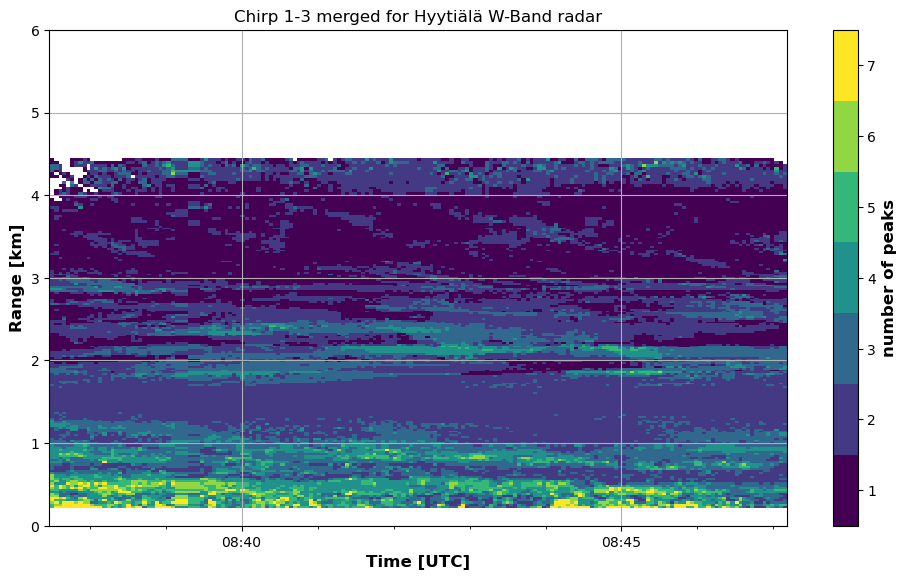

In [13]:
peaks_merged = p_1_peaks['manual'][0][0] +  p_2_peaks['manual'][0][0] + p_3_peaks['manual'][0][0]
fig, ax = pypeako.peako.plot_timeheight_numpeaks(peaks_merged, key='PeakoPeaks', maxpeaks=7)
ax.set_title(f'Chirp 1-3 merged for Hyytiälä W-Band radar')
ax.set_ylim(0,6)
ax.grid()


/Users/teresa/Documents/Teresa/work/PhD/code/pyPEAKO/pypeako/peako.py:1469: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 10. This could degrade performance. Instead, consider rechunking after loading.
  smoothed_spectra = [xr.open_dataset(f, mask_and_scale=True, chunks={"time": 10})
/opt/homebrew/anaconda3/envs/dopplerspectrum/lib/python3.12/site-packages/numpy/_core/numeric.py:366: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/opt/homebrew/anaconda3/envs/dopplerspectrum/lib/python3.12/site-packages/numpy/_core/numeric.py:366: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/Users/teresa/Documents/Teresa/work/PhD/code/pyPEAKO/pypeako/peako.py:1501: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 10. This could degrade performance. Instead, consider rechunking after 

loading averaged spectra files... ['PEAKO_files/240114_080000_P09_ZEN_cropped_x701_879_y4_177.LV0_t1_h1.NCtemp']


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'spectrum at 307 m, 08:40:01'}, xlabel='Doppler Velocity [m s$^{-1}$]', ylabel='reflectivity [dBZ]'>)

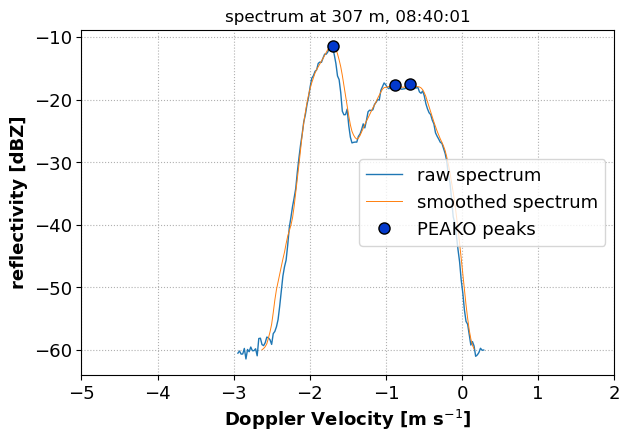

In [14]:
import datetime
time = [datetime.datetime(2024, 1, 14, 8, 40)]
height = [300]

P_1.plot_algorithm_spectrum(0, time, height, mode='manual', peako_params=[1, 1, 0.2, 2, 0, 0], plot_smoothed=True)

experimental single spectrum averaging!


/opt/homebrew/anaconda3/envs/dopplerspectrum/lib/python3.12/site-packages/numpy/_core/numeric.py:366: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/opt/homebrew/anaconda3/envs/dopplerspectrum/lib/python3.12/site-packages/numpy/_core/numeric.py:366: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


experimental single spectrum averaging!


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'spectrum at 4088 m, 08:43:11'}, xlabel='Doppler Velocity [m s$^{-1}$]', ylabel='reflectivity [dBZ]'>)

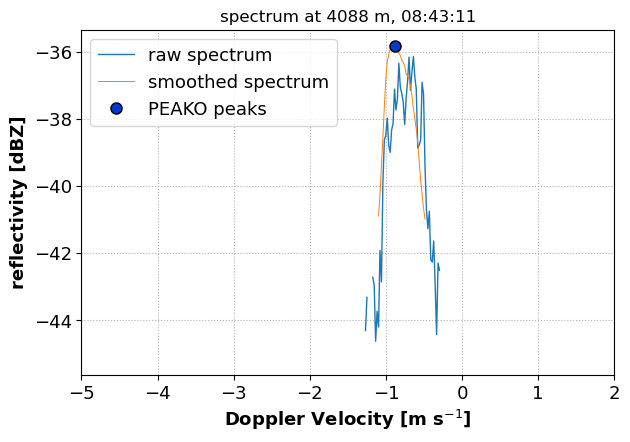

In [16]:
import datetime
time = [datetime.datetime(2024, 1, 14, 8, 43, 12)]
height = [4100]

P_3.plot_algorithm_spectrum(0, time, height, mode='manual', peako_params=[1, 1, 0.2, 2, 0, 1], plot_smoothed=True)